## INFO 6105 Final Project: Exploratory Data Analysis

#### Team Members:
Zhan Tang<br>
Xinru Zhang

### Why the Earthquake-Tsunami Dataset?
- Earthquakes and tsunamis are major natural disasters that cause severe loss of life and damage, especially in coastal regions
- Identifying which earthquakes are likely to trigger tsunamis is crucial for early warning systems and emergency preparedness
- This dataset contains real historical earthquake events with detailed seismic measurements, which provides a rich foundation for meaningful analysis and feature exploration
- Using machine learning, we aim to differentiate earthquakes that are likely to produce tsunamis from those that are not, helping highlight the characteristics associated with higher-risk seismic events

### Data Collection <br>
- **Data Source**: USGS
- **Collection Method**: USGS earthquake API (https://earthquake.usgs.gov/fdsnws/event/1/)
    - Python script： ``/Data/collect_earthquake_data.py``
- **Data Filtering**:
    - magnitude >= 6.0：according to USGS and the Intergovernmental Oceanographic Commission, tsunamis are generally triggered by earthquakes with a magnitude of 6.0 or higher.
    - year >= 2013：we found that tsunami data is only available starting from 2013.

### Import Libraries

In [43]:
import pandas as pd
import math

#Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

### Exploratory Data Analysis

#### Load the dataset

In [44]:
df = pd.read_csv("../Data/earthquake_tsunami_raw_data.csv")

In [45]:
df.head()

,title,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,...,tsunami,place,alert,magType,rms,code,net,type,status,datetime
0,M 6.4 - Banda Sea,6.4,3.1,4.304,635,263.0,2.165,16.0,142.0,-6.7001,...,0,Banda Sea,green,mww,0.67,6000rjx3,us,earthquake,reviewed,2025-10-28 14:40:18.481
1,"M 6.0 - 7 km SE of Sındırgı, Turkey",6.0,7.7,8.064,797,130.0,1.051,21.0,8.0,39.1959,...,0,"7 km SE of Sındırgı, Turkey",yellow,mww,0.60,6000rjsu,us,earthquake,reviewed,2025-10-27 19:48:28.789
2,"M 6.0 - 166 km E of Beauséjour, Guadeloupe",6.0,3.4,3.368,557,145.0,1.478,28.0,10.0,16.5417,...,0,"166 km E of Beauséjour, Guadeloupe",green,mb,0.70,6000rjqj,us,earthquake,reviewed,2025-10-27 12:54:59.329
3,"M 6.5 - 161 km E of Beauséjour, Guadeloupe",6.5,4.3,3.876,702,161.0,1.432,21.0,9.0,16.5416,...,1,"161 km E of Beauséjour, Guadeloupe",green,mww,0.73,6000rjq8,us,earthquake,reviewed,2025-10-27 12:38:40.405
4,"M 6.2 - 57 km NW of Pante Makasar, Timor Leste",6.2,4.1,5.286,595,108.0,0.938,20.0,75.0,-8.8524,...,0,"57 km NW of Pante Makasar, Timor Leste",green,mww,0.93,6000rjkv,us,earthquake,reviewed,2025-10-26 17:04:25.617


#### Information about the dataset

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1758 non-null   object 
 1   magnitude  1758 non-null   float64
 2   cdi        1336 non-null   float64
 3   mmi        1756 non-null   float64
 4   sig        1758 non-null   int64  
 5   nst        543 non-null    float64
 6   dmin       1654 non-null   float64
 7   gap        1737 non-null   float64
 8   depth      1758 non-null   float64
 9   latitude   1758 non-null   float64
 10  longitude  1758 non-null   float64
 11  year       1758 non-null   int64  
 12  month      1758 non-null   int64  
 13  tsunami    1758 non-null   int64  
 14  place      1756 non-null   object 
 15  alert      1751 non-null   object 
 16  magType    1758 non-null   object 
 17  rms        1756 non-null   float64
 18  code       1758 non-null   object 
 19  net        1758 non-null   object 
 20  type    

Observation:
- There are total of 23 features. The dataset provides rich feature types including numerical, categorical, and textual

In [47]:
# Check the dataframe for shape and duplicates
print(f"Number of rows (observations) in the dataframe: {df.shape[0]}")
print(f"Number of columns (features) in the dataframe: {df.shape[1]}")
print(f"Number of duplicates in the dataframe: {df.duplicated().sum()}")

Number of rows (observations) in the dataframe: 1758
Number of columns (features) in the dataframe: 23
Number of duplicates in the dataframe: 0


In [48]:
# Check for missing values in the dataframe
print(f"Number of total missing values in the dataframe: {sum(df.isnull().sum())}")
print(f"Number of missing values for each feature:\n{df.isna().sum()}")

Number of total missing values in the dataframe: 1775
Number of missing values for each feature:
title           0
magnitude       0
cdi           422
mmi             2
sig             0
nst          1215
dmin          104
gap            21
depth           0
latitude        0
longitude       0
year            0
month           0
tsunami         0
place           2
alert           7
magType         0
rms             2
code            0
net             0
type            0
status          0
datetime        0
dtype: int64


Observation:
- There are a total of 1775 missing values in our dataframe, mainly in the following features: cdi (maximum reported intensity), nst (number of seismic stations used to determine the location), dmin (horizontal distance to the nearest station), and gap (largest azimuthal gap).
- We will handle the missing values in the Feature Selection and Engineering section.

In [49]:
df.describe()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,year,month,tsunami,rms
count,1758.000000,1336.000000,1756.000000,1758.000000,543.000000,1654.000000,1737.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1758.000000,1756.000000
mean,6.385739,5.104117,4.582912,715.168942,210.268877,3.551737,33.169079,81.235460,-0.662269,36.858711,2018.802617,6.534130,0.332196,0.879406
std,0.427560,2.297145,2.192737,300.061829,132.118858,4.172852,23.915324,146.569861,30.467877,126.273022,3.730118,3.390657,0.471135,0.231521
min,6.000000,0.000000,0.000000,554.000000,11.000000,0.008000,8.000000,0.000000,-69.773900,-179.962100,2013.000000,1.000000,0.000000,0.060000
25%,6.100000,3.400000,3.698000,573.000000,120.500000,1.132000,19.000000,10.000000,-21.112750,-75.624325,2015.000000,4.000000,0.000000,0.720000
50%,6.200000,5.200000,4.687500,622.000000,163.000000,2.286500,26.000000,20.000000,-5.278150,100.454250,2019.000000,7.000000,0.000000,0.870000
75%,6.600000,6.900000,6.169500,718.000000,267.000000,4.463250,40.000000,57.890000,21.930825,148.019575,2022.000000,9.000000,1.000000,1.030000
max,8.800000,9.100000,9.953000,2910.000000,770.000000,31.555000,278.000000,670.810000,74.385900,179.998100,2025.000000,12.000000,1.000000,1.680000


#### Visualization

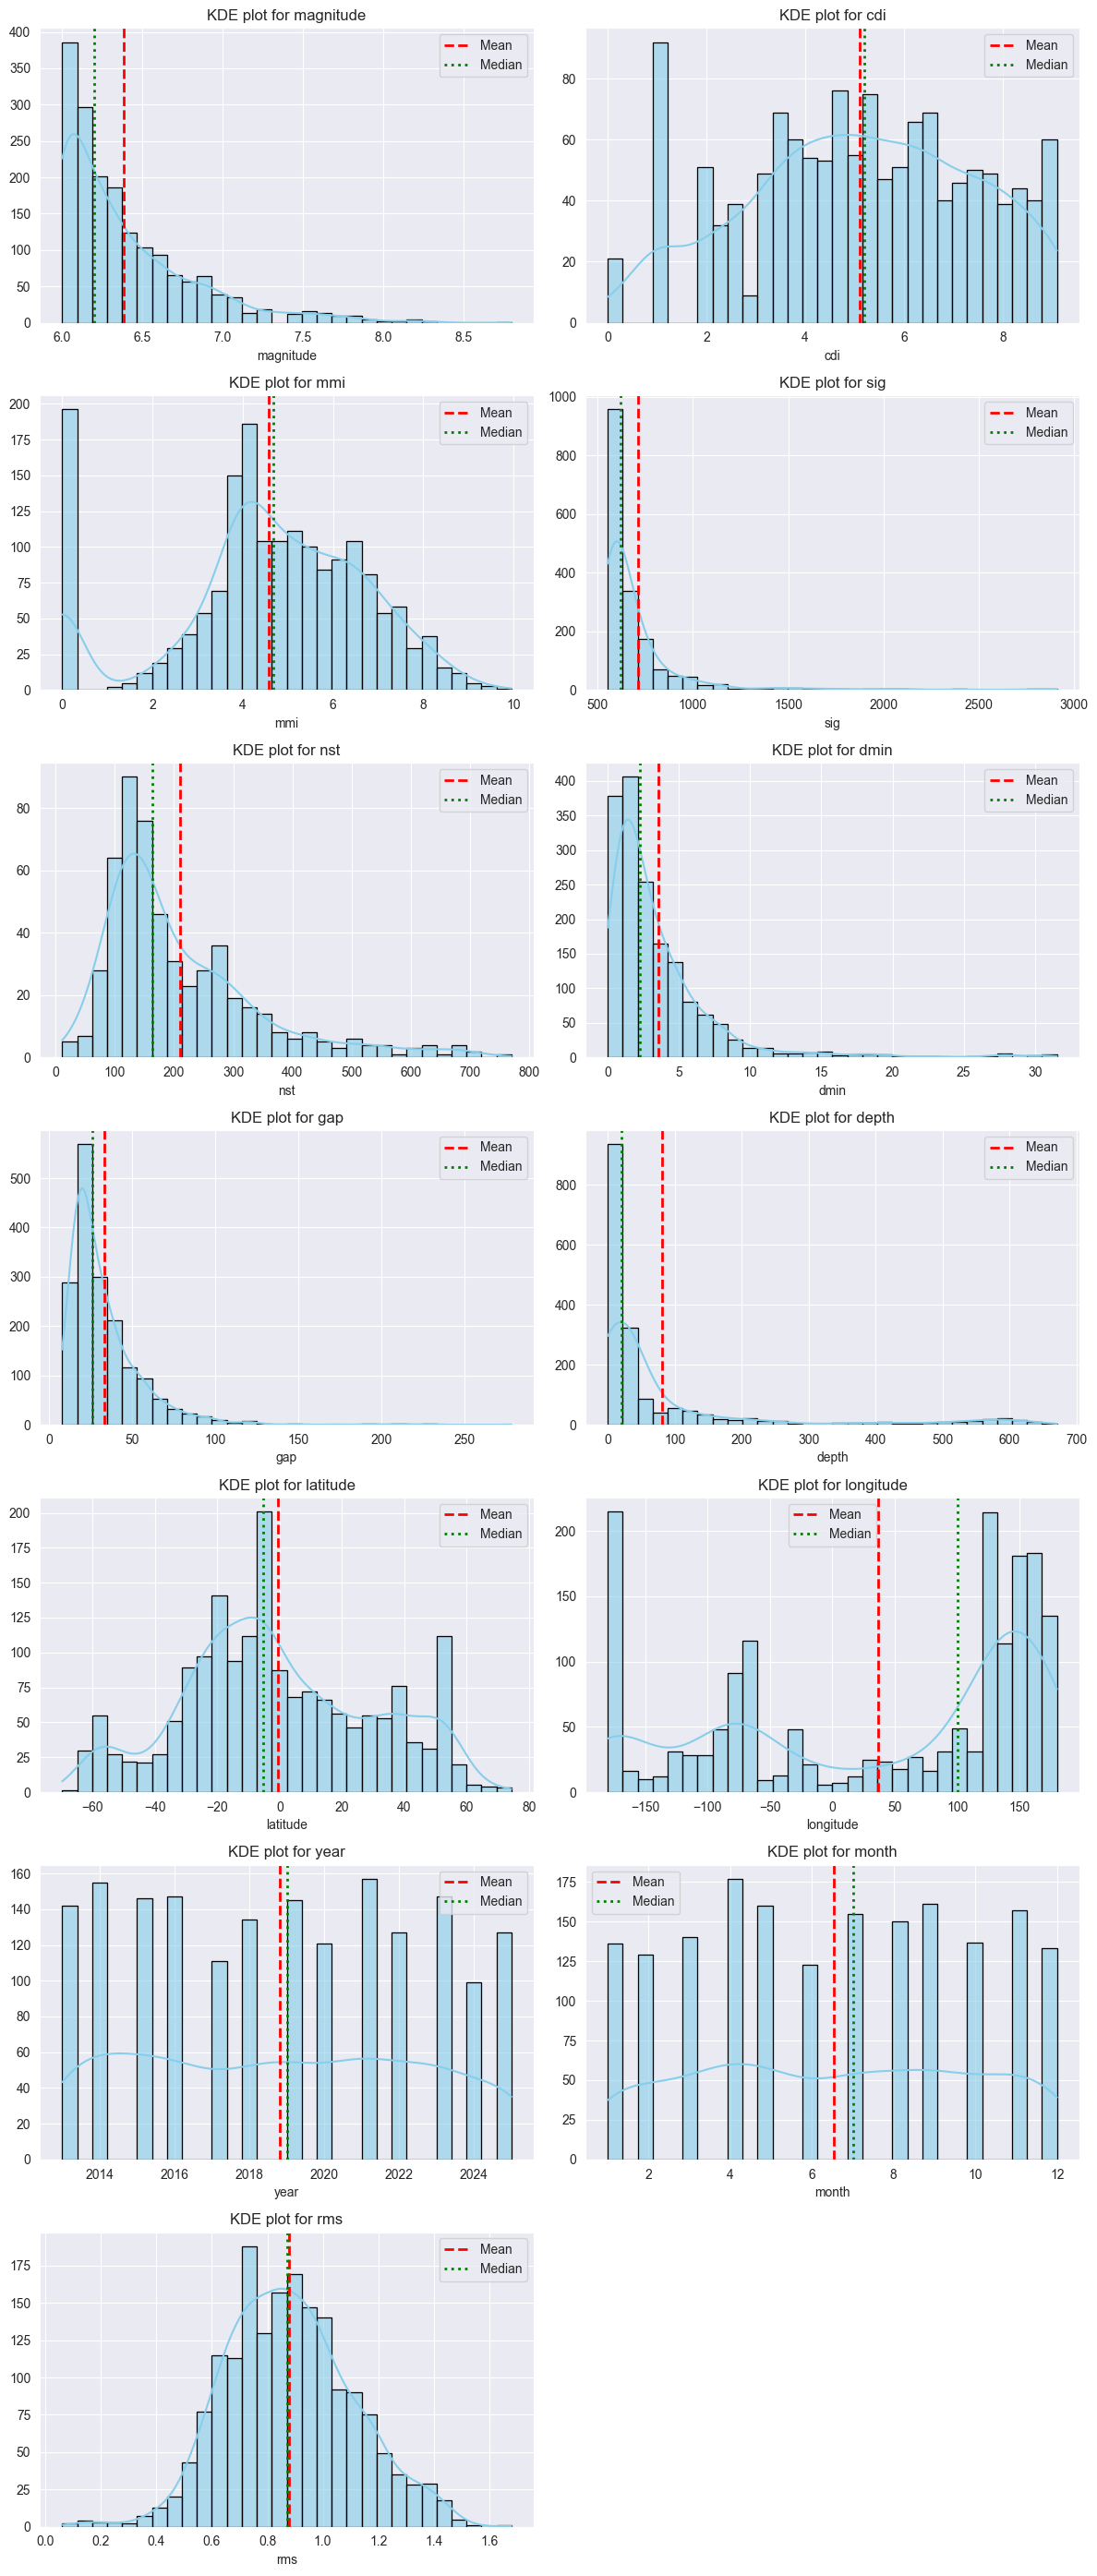

In [50]:
# Visualize numerical features
# Drop tsunami because it is a binary indicator. It will be visualized in the next section
numerical_columns_all = df.select_dtypes(include=["int64", "float64"])
numerical_columns = numerical_columns_all.columns.drop(["tsunami"])
n = len(numerical_columns)
ncols = 2
rows = math.ceil(n / ncols)
plt.figure(figsize=(ncols * 6, rows * 4))

for i, col in enumerate(numerical_columns):
    plt.subplot(rows, ncols, i + 1)
    sns.histplot(df[col], bins=30, kde=True, color="skyblue", edgecolor="black", alpha=0.6)
    mean_value = df[col].mean()
    median_value = df[col].median()

    plt.axvline(mean_value, color="red", linestyle="dashed", linewidth=2, label="Mean")
    plt.axvline(median_value, color="green", linestyle="dotted", linewidth=2, label="Median")
    plt.legend()

    plt.title(f"KDE plot for {col}", fontsize=12)
    plt.xlabel(col)
    plt.ylabel("")

plt.tight_layout()
plt.show()

Observation:
- Intensity-related features (magnitude, mmi, cdi, sig)
    - Magnitude and sig (significance score) are both right-skewed. Most earthquakes have a magnitude between 6.0 and 7.0 and a sig less than 1000. This indicates that most earthquakes are moderate to strong events.
    - Mmi (instrumental intensity) shows peaks at 0 and around 4. A large number of earthquakes have missing values for mmi. Other than the missing values, most earthquakes are moderate in terms of intensity.
    - Cdi (reported intensity) displays a wide range from 2 to 8, indicating differences in public reporting.
- Geometry-related features (nst, dmin, gap, rms)
    - Nst (number of reporting stations) is right-skewed. Most earthquakes are reported by 100 to 200 stations while few large events reported by more stations.
    - Dmin (horizontal distance to the nearest station) is strongly right-skewed with most values between 0 and 5. This shows that most earthquakes occur in seismic detection network and their calculated depths are reliable.
    - Gap (azimuthal gap between adjacent stations) shows a strong right-skewed distribution with most values centered below 25 degrees. This also suggests a good seismic station coverage for most earthquakes, and this also suggests the calculated horizontal position of most earthquakes are reliable.
    - Rms (location residual error) follows a nearly normal distribution with a center around 0.9 second. This indicates a good fit between observed and predicted arrival times.
- Depth-related feature (depth)
    - Depth is strongly right-skewed with most events occurring at shallow depth less than 100 kilometers. However, there are few very deep events happening at around 600 kilometers, therefore, the mean value of depth is around 100 kilometers.
- Geography-related features (latitude, longitude)
    - Latitude follows a multimodal distribution with peaks around -60, -20, 0 and 40 degrees. This suggests that the dataset includes earthquakes from diverse seismic regions.
    - Longitude also follows a multimodal distribution with peaks around -150 to -50 and 100 to 160 degrees, which reflects the Pacific Ring of Fire's frequent earthquake activities.
- Time-related features (year, month)
    - Year follows a relatively uniform distribution from 2013 to 2025 with slight variations. This indicates consistent earthquake events and data collection over 10 years.
    - Month distribution is fairly even with no strong seasonal patterns. This shows that earthquakes are not influenced by seasonal factors.

<Figure size 1400x1000 with 0 Axes>

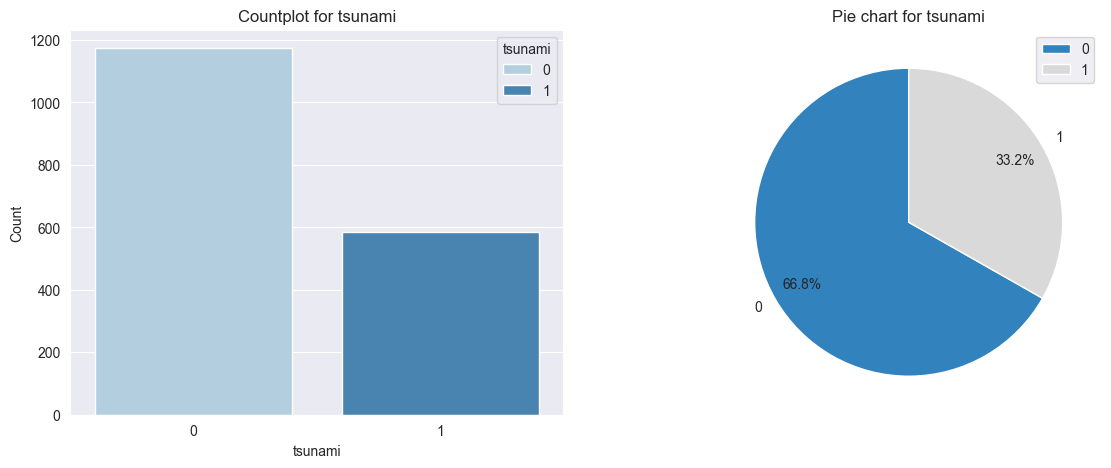

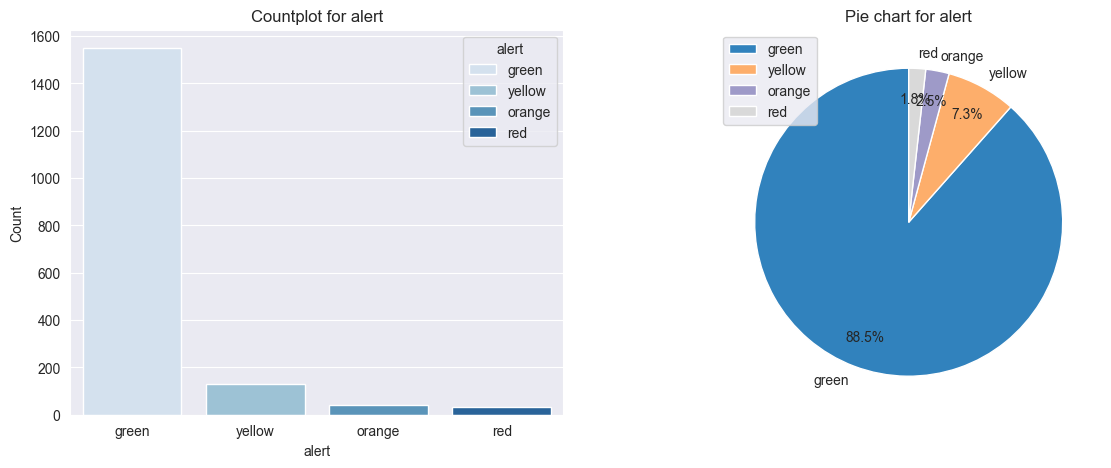

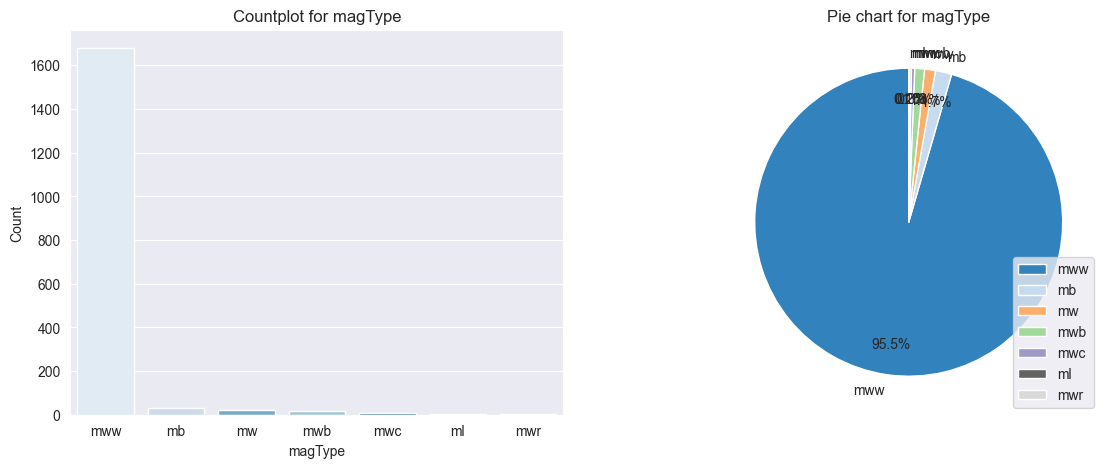

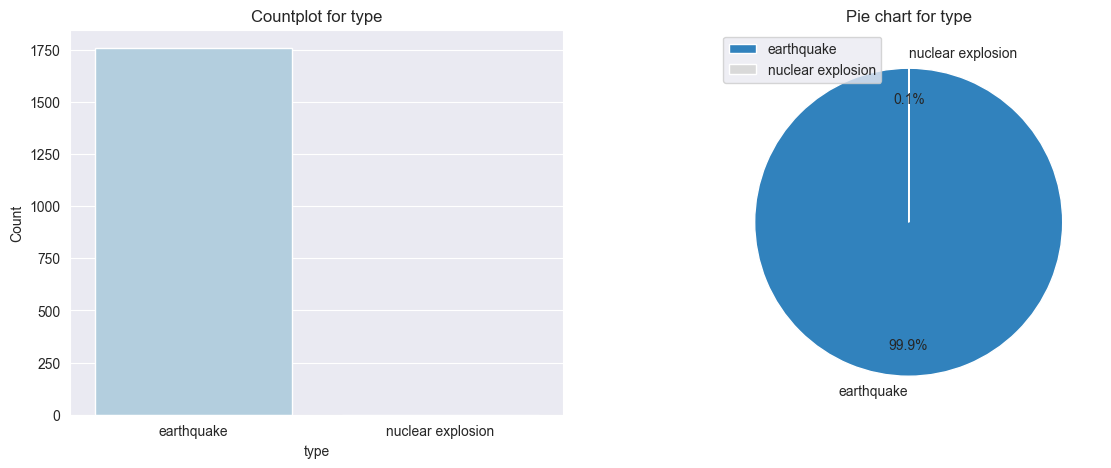

In [51]:
# Visualize non-numerical features and tsunami
# We did not include the following features for visualization because they contain duplicated or irrelevant information:
#   - title: name given to the earthquake
#   - place: duplicate with title
#   - code: unique id of earthquake
#   - net: id of data contributor
#   - status: an indicator of whether the event has been reviewed by a human
#   - datetime: duplicate with month and year
categorical_features = ["tsunami", "alert", "magType", "type"]
plt.figure(figsize=(14,10))
for col in categorical_features:
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[0], hue=col, palette="Blues")
    axes[0].set_title(f"Countplot for {col}", fontsize=12)
    axes[0].set_xlabel(col)
    axes[0].set_ylabel("Count")

    df[col].value_counts().plot(
        kind="pie",
        ax=axes[1],
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops={"linewidth": 1, "edgecolor": "white"},
        legend=True,
        pctdistance=0.8,
        labeldistance=1.1,
        colormap="tab20c"
    )
    axes[1].set_title(f"Pie chart for {col}", fontsize=12)
    axes[1].set_ylabel("")

plt.tight_layout
plt.show()

Observation:
- Tsunami: 66.8% of the earthquakes are labeled as 0 and 33.2% are labeled as 1 for tsunami, which means 33.2% of the earthquakes produced tsunamis.
- Alert: Most earthquakes with valid alert features are labeled as green in terms of their impact scales.
- MagType (method used to calculate magnitude): The most common magnitude type is mww ((Moment W-phase).
- Type: 99.9% of earthquakes in the dataset are true positive. 0.1% of the events are labeled as nuclear explosion. We will remove the false positive nuclear explosions during the feature engineering section.

In [52]:
# Correlation matrix
correlation = numerical_columns_all.corr()
correlation

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,year,month,tsunami,rms
magnitude,1.000000,0.337808,0.311673,0.539079,0.141156,-0.066817,-0.160209,0.079952,0.017714,-0.004212,-0.026383,-0.008217,0.550249,0.029354
cdi,0.337808,1.000000,0.676486,0.467892,-0.003202,-0.303269,-0.009537,-0.247654,0.242053,0.033698,0.077849,-0.001210,0.144182,0.001842
mmi,0.311673,0.676486,1.000000,0.444680,0.163992,-0.514735,-0.039030,-0.262895,0.369412,0.105572,-0.020954,-0.012285,0.191160,0.008762
sig,0.539079,0.467892,0.444680,1.000000,0.041239,-0.154970,-0.016279,-0.063756,0.229358,-0.056993,0.043509,-0.013792,0.203048,-0.065676
nst,0.141156,-0.003202,0.163992,0.041239,1.000000,-0.117004,-0.326841,0.072807,0.157333,0.110598,-0.594329,-0.254008,0.052366,0.123162
dmin,-0.066817,-0.303269,-0.514735,-0.154970,-0.117004,1.000000,0.007159,-0.037158,-0.380564,-0.081836,-0.009872,0.006348,-0.092027,-0.053181
gap,-0.160209,-0.009537,-0.039030,-0.016279,-0.326841,0.007159,1.000000,-0.209862,0.040682,-0.283604,0.163269,0.040398,-0.036353,-0.121549
depth,0.079952,-0.247654,-0.262895,-0.063756,0.072807,-0.037158,-0.209862,1.000000,-0.058864,-0.011408,-0.011614,-0.004862,-0.045576,0.045344
latitude,0.017714,0.242053,0.369412,0.229358,0.157333,-0.380564,0.040682,-0.058864,1.000000,0.141573,0.024869,0.000457,0.083061,-0.069125
longitude,-0.004212,0.033698,0.105572,-0.056993,0.110598,-0.081836,-0.283604,-0.011408,0.141573,1.000000,0.020853,-0.018016,-0.090214,-0.030184


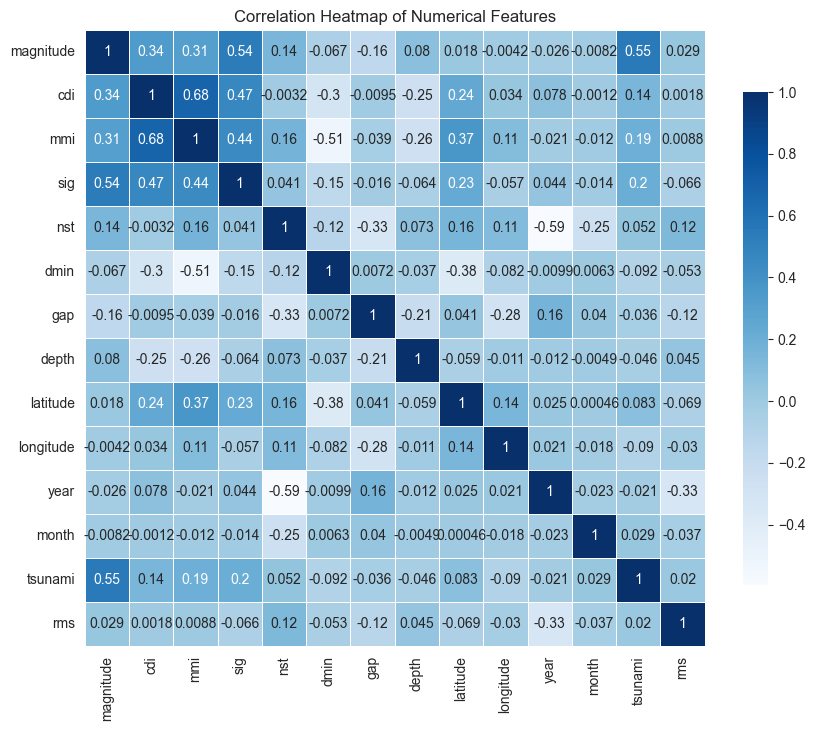

In [53]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation,
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap of Numerical Features", fontsize=12)
plt.show()

In [54]:
# Correlation with tsunami
correlation_with_target = correlation["tsunami"].sort_values(ascending=False)
print("Correlation with target value tsunami: ")
correlation_with_target

Correlation with target value tsunami: 


tsunami      1.000000
magnitude    0.550249
sig          0.203048
mmi          0.191160
cdi          0.144182
latitude     0.083061
nst          0.052366
month        0.029240
rms          0.019724
year        -0.021287
gap         -0.036353
depth       -0.045576
longitude   -0.090214
dmin        -0.092027
Name: tsunami, dtype: float64

Observation:
- Strongest positive correlation:
    - Magnitude has a strong correlation with cdi (reported intensity), mmi (instrumental intensity), and sig (significance score). This is expected because the larger the magnitude is, the larger the sig will be. And since cdi and mmi both measure shaking intensity, they will also be higher if the magnitude is large.
    - Cdi (reported intensity) has a strong correlation with mmi (instrumental intensity) and sig (significance score). Likewise, this is also expected because the larger the cdi is, the stronger the earthquake and shaking movement will be, leading to larger mmi and sig.
- Strongest negative correlation:
    - Mmi (instrumental intensity) has a strong negative correlation with dmin (distance from nearest station) and depth. Earthquakes far away from nearest seismic station or with a deeper epicenter are generally recorded with a lower intensity.
    - Year has a strong negative correlation with nst (number of seismic stations used to determine earthquake location). This is possibly due to increased technologies which require fewer seismic stations to detect earthquake locations. Year also has a strong negative correlation with rms (root-mean-square travel time residual). This is due to the increased location quality (measured by rms) over time. Technology advances have improved the seismic location detection algorithm.
- Correlations with tsunami:
    - Tsunami and magnitude has a strong positive correlation, which is expected because large earthquakes are more likely to produce tsunamis.
    - Tsunami and cdi (reported intensity), mmi (instrumental intensity) and sig (significance score) has a relatively strong positive correlation. This is also expected because all cdi, mmi and sig are used to measure the intensity of earthquake events.
- Overall, most numerical features show week correlation with each other, which indicates weak linear relationships. Correlations between most features and the tsunami flag are weak. We need to consider non-linear machine learning models for the tsunami prediction task.

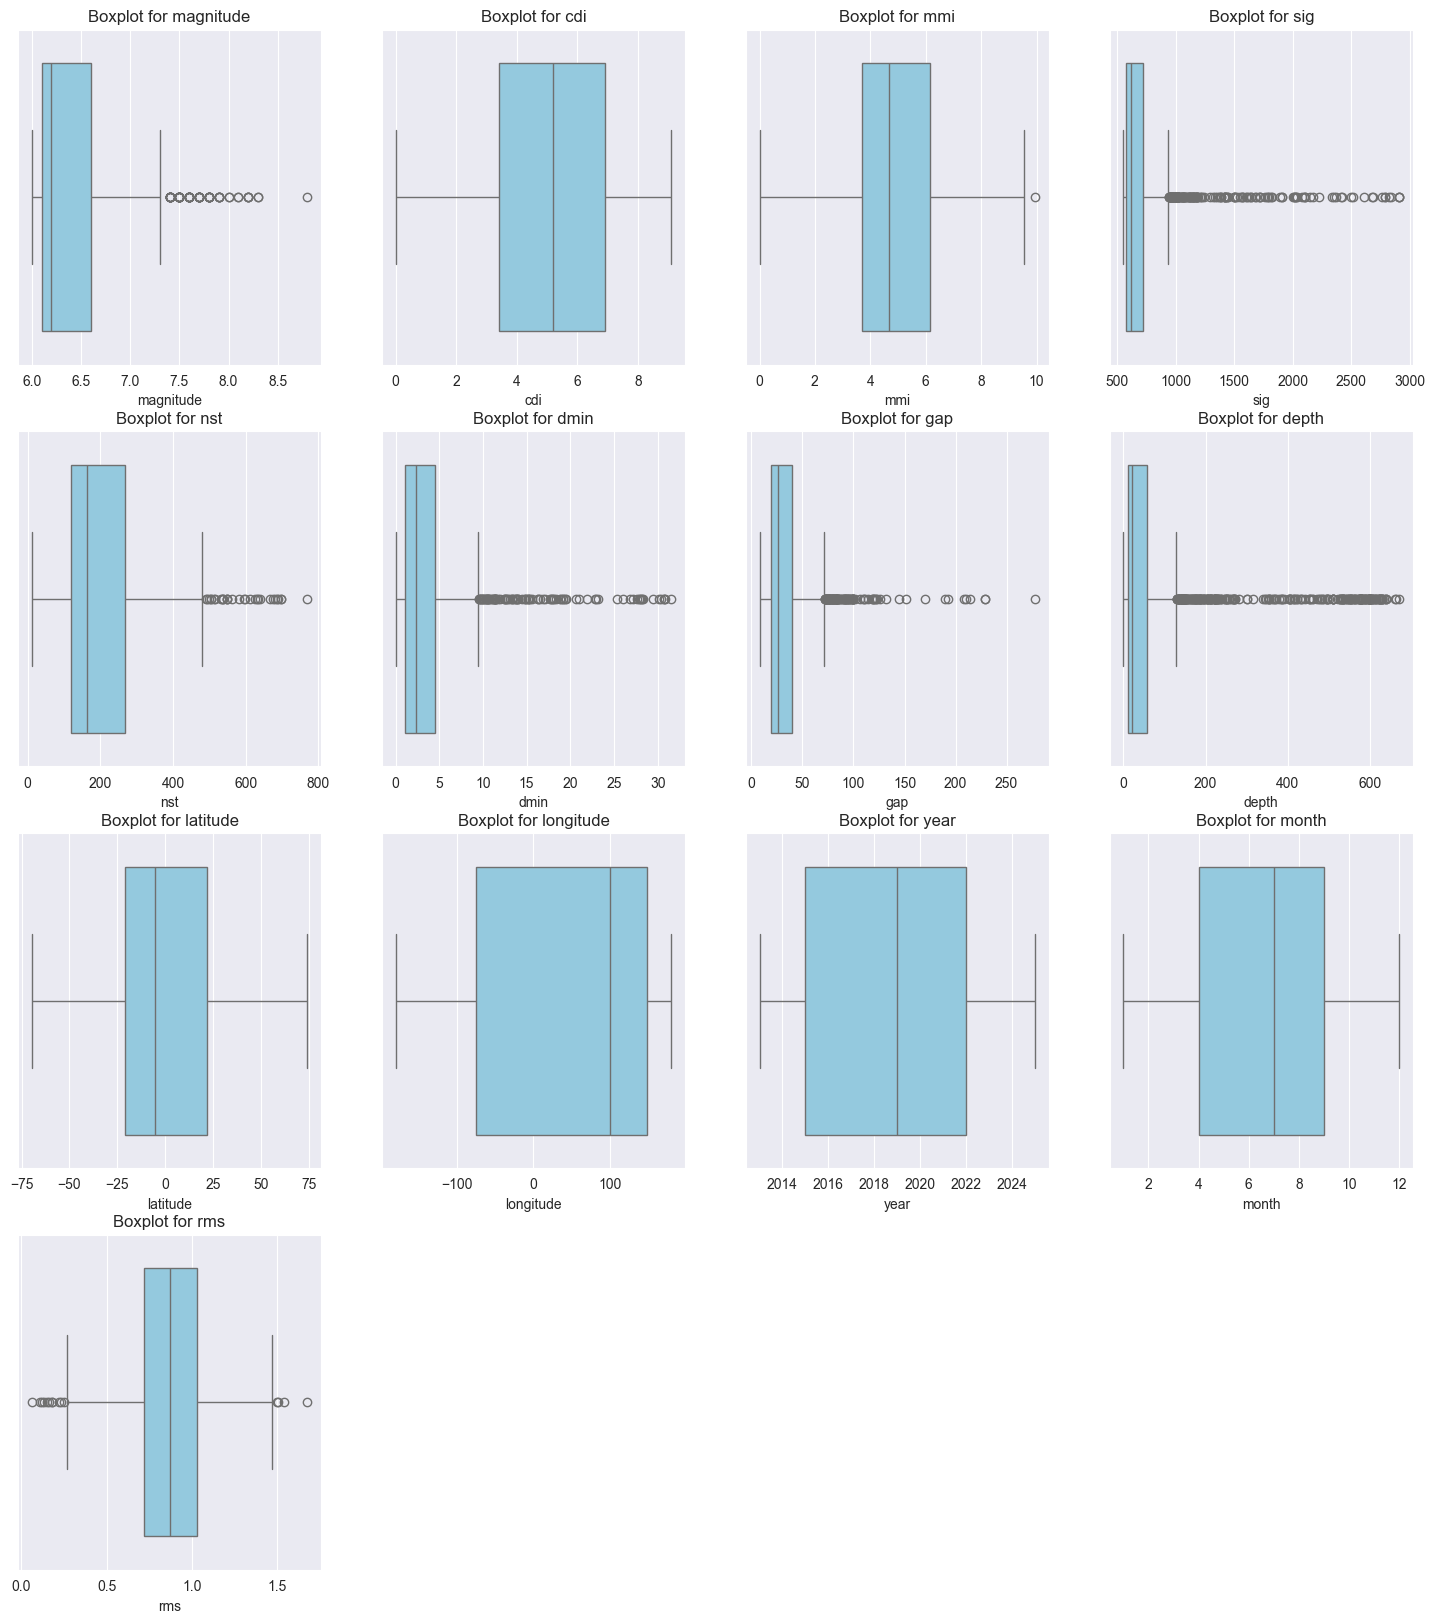

In [55]:
# Check for outliers
# Boxplot for each numerical features except for tsunami
col_boxplot = 3
row_boxplot = math.ceil(len(numerical_columns) / col_boxplot)
plt.figure(figsize=(18, row_boxplot * 4))
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(x=df[col], color="skyblue")
    plt.title(f"Boxplot for {col}", fontsize=12)

plt.show()

In [56]:
# Check for outliers with IQR
def check_outliers(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return len(outliers)

total_outlier = 0
print("Outliers with IQR method:")
for col in numerical_columns:
    count = check_outliers(df[col])
    total_outlier += count
    print(f"Outliers for {col}: {count}")
print(f"Total outliers in dataset: {total_outlier}")

Outliers with IQR method:
Outliers for magnitude: 76
Outliers for cdi: 0
Outliers for mmi: 1
Outliers for sig: 168
Outliers for nst: 31
Outliers for dmin: 95
Outliers for gap: 99
Outliers for depth: 276
Outliers for latitude: 0
Outliers for longitude: 0
Outliers for year: 0
Outliers for month: 0
Outliers for rms: 15
Total outliers in dataset: 761


Observation:<br>
The dataset contains total of 761 outliers across features. These values represent real seismic events rather than biased data points. Earthquakes events naturally follow a skewed distribution where large but rare earthquakes produce extreme outliers. Removing or clipping such values will reduce information needed for machine learning. Therefore, we decide to keep all outliers and remove only incorrect values if they present.

In [57]:
# Interactive heatmap for earthquakes and tsunamis
center_lat = df["latitude"].mean()
center_lon = df["longitude"].mean()

m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=2,
    tiles="CartoDB positron",
    scrollWheelZoom=True
)

heat_data = [[row["latitude"], row["longitude"]] for idx, row in df.iterrows()]

HeatMap(
    heat_data,
    name="Earthquake Heatmap",
    min_opacity=0.2,
    max_opacity=0.8,
    radius=15,
    blur=20,
    gradient={
    0.0: "#000080",
    0.15: "#0000FF",
    0.3: "#00FFFF",
    0.45: "#00FF00",
    0.6: "#FFFF00",
    0.75: "#FFA500",
    0.9: "#FF4500",
    1.0: "#FF0000"

}

).add_to(m)

tsunami_df = df[df["tsunami"] == 1]

tsunami_layer = folium.FeatureGroup(name="Tsunami Events")

for idx, row in tsunami_df.iterrows():
    popup_text = f"""
    <b>Tsunami Event</b><br>
    Magnitude: {row['magnitude']}<br>
    Latitude: {row['latitude']:.2f}<br>
    Longitude: {row['longitude']:.2f}<br>
    Depth: {row.get('depth', 'N/A')} km
    """
    folium.CircleMarker(
        location=[row["latitude"], row["longitude"]],
        radius=5,
        color="firebrick",
        fill_color="red",
        fill=True,
        fillOpacity=0.8,
        weight=1,
        popup=folium.Popup(popup_text, max_width=300)
    ).add_to(tsunami_layer)

tsunami_layer.add_to(m)
folium.LayerControl().add_to(m)
m